<a href="https://colab.research.google.com/github/dantecomedia/Graduate-Admission/blob/master/gradute_admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [4]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [11]:
ls

Admission_Predict.csv  Admission_Predict_Ver1.1.csv  ga.py


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 12)                96        
_________________________________________________________________
dense_110 (Dense)            (None, 100)               1300      
_________________________________________________________________
dense_111 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_112 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_113 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 101       
Total params: 31,797
Trainable params: 31,797
Non-trainable params: 0
_________________________________________________________________
Train 

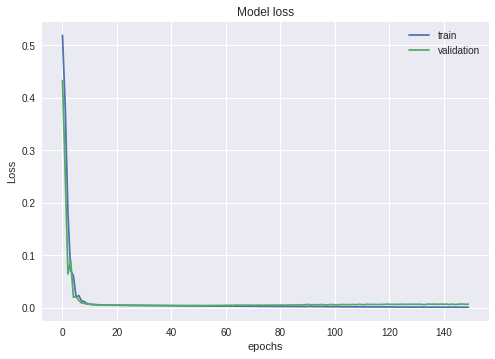

In [104]:
#importing libraries

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
 
#importing dataset
dataset=pd.read_csv('/content/gdrive/My Drive/GRADUATE ADMISSION/Admission_Predict.csv')
X=dataset.iloc[:,1:8].values
y=dataset.iloc[:,8].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=None)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

#i intentionally increased the number of nodes in each layer and increased the layer to play with the model

model=Sequential()
model.add(Dense(12,input_dim=7,kernel_initializer='normal',activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])


history=model.fit(X_train,y_train, epochs=150,batch_size=50, verbose=1, validation_split=0.2)

print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper right')
plt.show()


ynew=model.predict(X_test)
#Since its a regression model we are checking for accuracy by subtracting the predicted value from the actual value and if the difference is less than 0.05, we are counting it as 1  


        
        







In [0]:
c=0
for i in range(len(ynew)):
  diff=0
  if y_test[i]>ynew[i]:
    diff=y_test[i]-ynew[i]
  else:
    diff=ynew[i]-y_test[i]
  if diff<=0.05:
    c=c+1
      

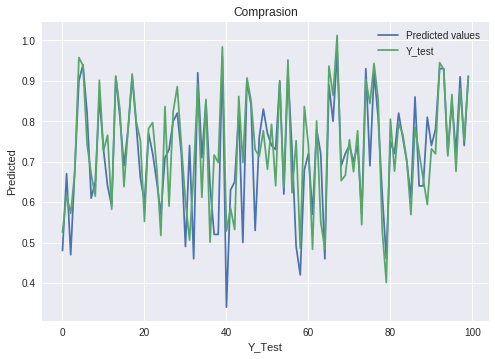

In [108]:
plt.plot(y_test)
plt.plot(ynew)
plt.title('Comprasion')
plt.ylabel('Predicted')
plt.xlabel('Y_Test')
plt.legend(['Predicted values','Y_test'],loc='upper right')
plt.show()


In [107]:
c

56